In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the training dataset just to have a look
train = pd.read_csv(r"C:\Users\guak2001\OneDrive - Nielsen IQ\ML_Learning_projects\Disease_classifier\Training.csv")
train.head(2)
train =  train.dropna(axis=1)

In [3]:
# whenever working on classification problem check whether target variable is balanced or not
# first we are checking the count of each disease
disease_count = train['prognosis'].value_counts()
disease_count

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [4]:
temp_df = pd.DataFrame({"Disease": disease_count.index ,"Counts" : disease_count.values})
temp_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


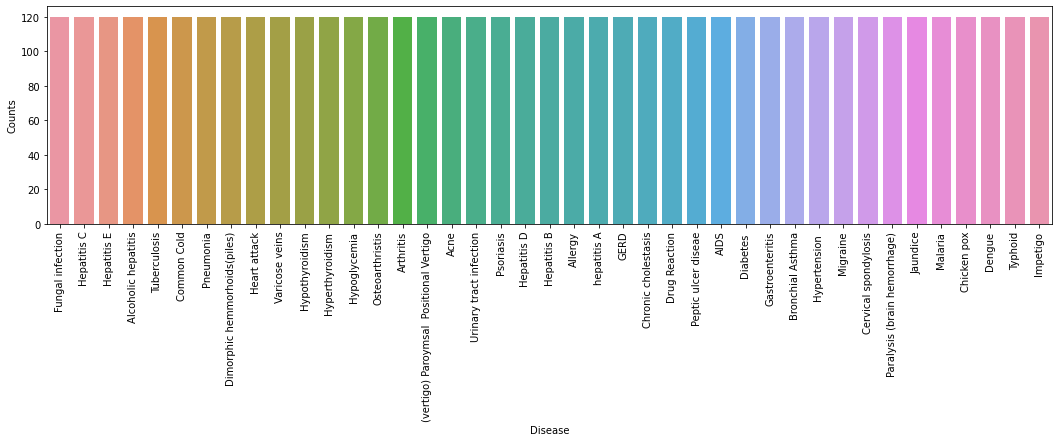

In [5]:
plt.figure(figsize=(18,4))
sns.barplot(x = "Disease", y = 'Counts', data = temp_df)
plt.xticks(rotation = 90)
plt.show()

In [6]:
# our prognosis variable is of type string so changing that to numerical with help of label encoding
# using sklearn for label encoding
from sklearn import preprocessing 

# making a label encoder object
label_encoder = preprocessing.LabelEncoder()

# choose the column you want label encoder to work on
train['prognosis'] = label_encoder.fit_transform(train['prognosis'])
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [7]:
# checking the new prognosis column
train.prognosis.unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [8]:
# doing the train test split 
from sklearn.model_selection import train_test_split
x = train.iloc[:,:-1]
y = train.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [9]:
# We will use K fold cross validation to determine the best model among multiple choices like SVM,Random Forest,Naive Baye's
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

## define a scoring metric for K fold
def cv_scoring(estimator,x,y):
    return accuracy_score(y,estimator.predict(x))

## initialize models
models = {'SVC':SVC(),"Gaussian NB":GaussianNB(),"Random Forest":RandomForestClassifier(random_state=18)}

## producing score for all the models
for model_name in models:
    model = models[model_name]
    score = cross_val_score(model,x,y,cv=10,scoring=cv_scoring,n_jobs= -1)
    
    print("=="*30)
    print(model_name)
    print(f"Scores: {score}")
    print(f"Mean Score: {np.mean(score)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


accuracy on training data:100.0
accuracy on test data:100.0


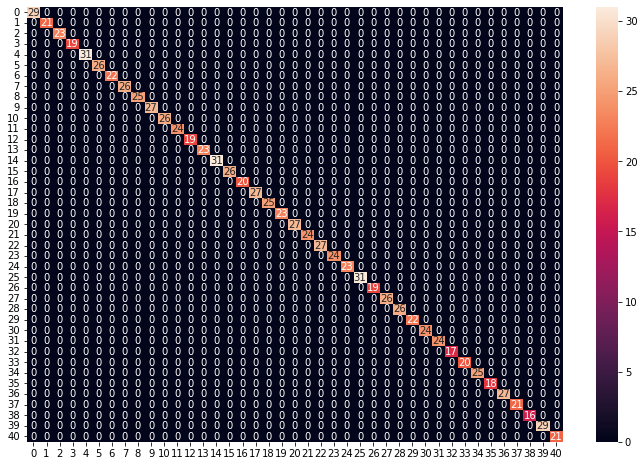

In [10]:
## now as all the models score is good taking SVC and proceeding ahead

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix as cf
svm_model = SVC()
svm_model.fit(x_train,y_train)
preds = svm_model.predict(x_test)
print(f"accuracy on training data:{accuracy_score(y_train,svm_model.predict(x_train))*100}")
print(f"accuracy on test data:{accuracy_score(y_test,preds)*100}")
cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.show()


In [11]:
## create a function which take symptoms as a input and then predict the disease
symptoms = x.columns
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
 
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":label_encoder.classes_
}

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [14]:
## Defining a function that will automatically give disease on the basis of symptoms

def predict_disease(symptoms):
    symptoms = symptoms.split(",")
    
    
    ## create input data for model
    input_data = [0]*len(data_dict['symptom_index'])
    for symptom in symptoms:
        index = data_dict['symptom_index'][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1,-1)
    
    # SVM prediction
    svm_prediction = data_dict['predictions_classes'][svm_model.predict(input_data)[0]]
    return svm_prediction

In [15]:
predict_disease('Skin Rash,Itching')

C:\Users\guak2001\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'Fungal infection'